In [66]:
import pathlib, re, pickle, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from elyawy.constants import SUMSTATS_LIST, SUMSTATS_DEFINITION
from elyawy.io import load_sims_df
from scipy import stats as st
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


In [5]:
MAIN_PATH = '''/home/elyawy/Data/tenericutes'''

MAIN_PATH = pathlib.Path(re.sub(r"\n\s*","", MAIN_PATH))

In [44]:
true_stats_with_params = pd.read_csv(MAIN_PATH / "true_stats.csv")
realinged_stats = pd.read_csv(MAIN_PATH / "realigned_stats.csv")

In [76]:
X = true_stats_with_params
Y = realinged_stats
X_nomralized = (X-X.mean())/(X.std()+1e-4)
X_train = X_nomralized[:400]
X_test = X_nomralized[400:]
Y_train = realinged_stats[:400]
Y_test = realinged_stats[400:]


In [72]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.293035,-0.759091,-0.759091,-0.604561,-0.604561,-0.130595,-0.224835,0.095924,0.692776,-0.726290,...,0.786986,-1.232349,-0.546933,-0.350808,-0.446184,-0.443772,0.521498,-0.155211,-0.354545,-0.484638
1,-1.144449,0.640223,0.640223,-1.355558,-1.355558,1.180201,0.894116,-0.634057,-0.612901,-0.096896,...,-0.523565,-0.731394,-0.546933,0.689453,0.165865,0.793839,-1.678964,1.388360,1.069572,1.375619
2,-1.482681,0.989213,0.989213,-1.359607,-1.359607,1.790536,0.786667,-1.003059,-1.242913,-0.480673,...,-0.523565,-0.731394,-1.323827,0.289353,1.236952,-0.266970,-2.066610,1.281572,1.139775,1.582314
3,-0.288300,-0.909652,-0.909652,1.119544,1.119544,-0.771496,-0.965862,-0.345273,-0.074195,-1.048663,...,-0.851202,-0.731394,0.618407,-0.590869,-0.905222,-1.681383,0.823634,-0.873603,-0.906139,-1.080689
4,-1.197298,1.080482,1.080482,0.448670,0.448670,-0.363603,-0.680567,-1.171516,-1.169868,0.363636,...,0.131710,0.771470,0.618407,0.209333,-0.140159,0.086633,-0.692747,-0.174627,-0.214139,-0.109702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.736964,-0.352206,-0.352206,0.540392,0.540392,-0.585187,-0.069219,0.521078,0.984955,0.317583,...,0.131710,0.270516,1.395301,-1.070989,-0.293172,0.617037,1.074464,-0.805647,-0.535067,-0.340432
196,1.244312,0.070792,0.070792,-0.286113,-0.286113,-0.178262,0.553243,1.082603,1.039739,0.194774,...,1.114623,-0.230439,-0.546933,0.369373,0.318878,0.793839,0.515798,0.776756,0.086731,-0.143350
197,0.715825,1.164972,1.164972,0.719033,0.719033,-0.524221,0.601410,1.226995,1.258873,1.653127,...,2.097536,-0.230439,2.560641,-0.030728,-0.140159,1.324243,0.789430,-0.155211,-0.133907,0.255619
198,1.561404,0.239086,0.239086,-1.193945,-1.193945,1.173310,1.712951,0.914145,0.902780,0.102668,...,0.131710,-1.232349,-0.935380,0.689453,1.236952,0.793839,-0.464719,0.757340,0.698499,1.904374


In [77]:
clf = lgb.LGBMRegressor()
# clf_cv = GridSearchCV(clf, cv=10, param_grid={},
#                       scoring='neg_mean_squared_error')
clf_list = []
for label in range(0,27):
    label = str(label)
    print(label)
    clf.fit(X_train, Y_train[label])
    clf_list.append(copy.deepcopy(clf))
    # print(np.sqrt(-clf.best_score_))
    print(st.pearsonr(clf.predict(X_test), Y_test[label])[0]**2)
    print()

0
0.8714430464262257

1
0.9525969172802672

2
0.9938683989512442

3
0.9904048093008639

4
0.8807022141624807

5
0.6235762273362055

6
0.42336258134548

7
0.46184059154846513

8
0.8823183290671166

9
0.8831628558404835

10
0.911501338614464

11
0.2929848969914626

12
0.4408916229519196

13
0.3145494677521339

14
0.31859476974772943

15
0.2332631976037491

16
0.3115018365742014

17
0.21961919886954367

18
0.27886841955264585

19
0.1757404913388168

20
0.8619867308992858

21
0.6968052787133981

22
0.2628048293406434

23
0.9614262912260113

24
0.8140430001471387

25
0.9230388566444475

26
0.8314932909418202



In [78]:
clf_list[19].best_estimator_.

SyntaxError: invalid syntax (2854003833.py, line 1)

In [62]:
infered_stats = {}
for idx, clf_ in enumerate(clf_list):
    y_predicted = pd.Series(clf_.predict(X_train))
    infered_stats[str(idx)] = y_predicted
infered_stats = pd.DataFrame(infered_stats)


In [63]:
true_stats = pd.read_csv(MAIN_PATH / "true_stats.csv")
true_stats = true_stats[map(str, range(5,len(true_stats.columns)))]
true_stats.columns = map(str, range(0,27))

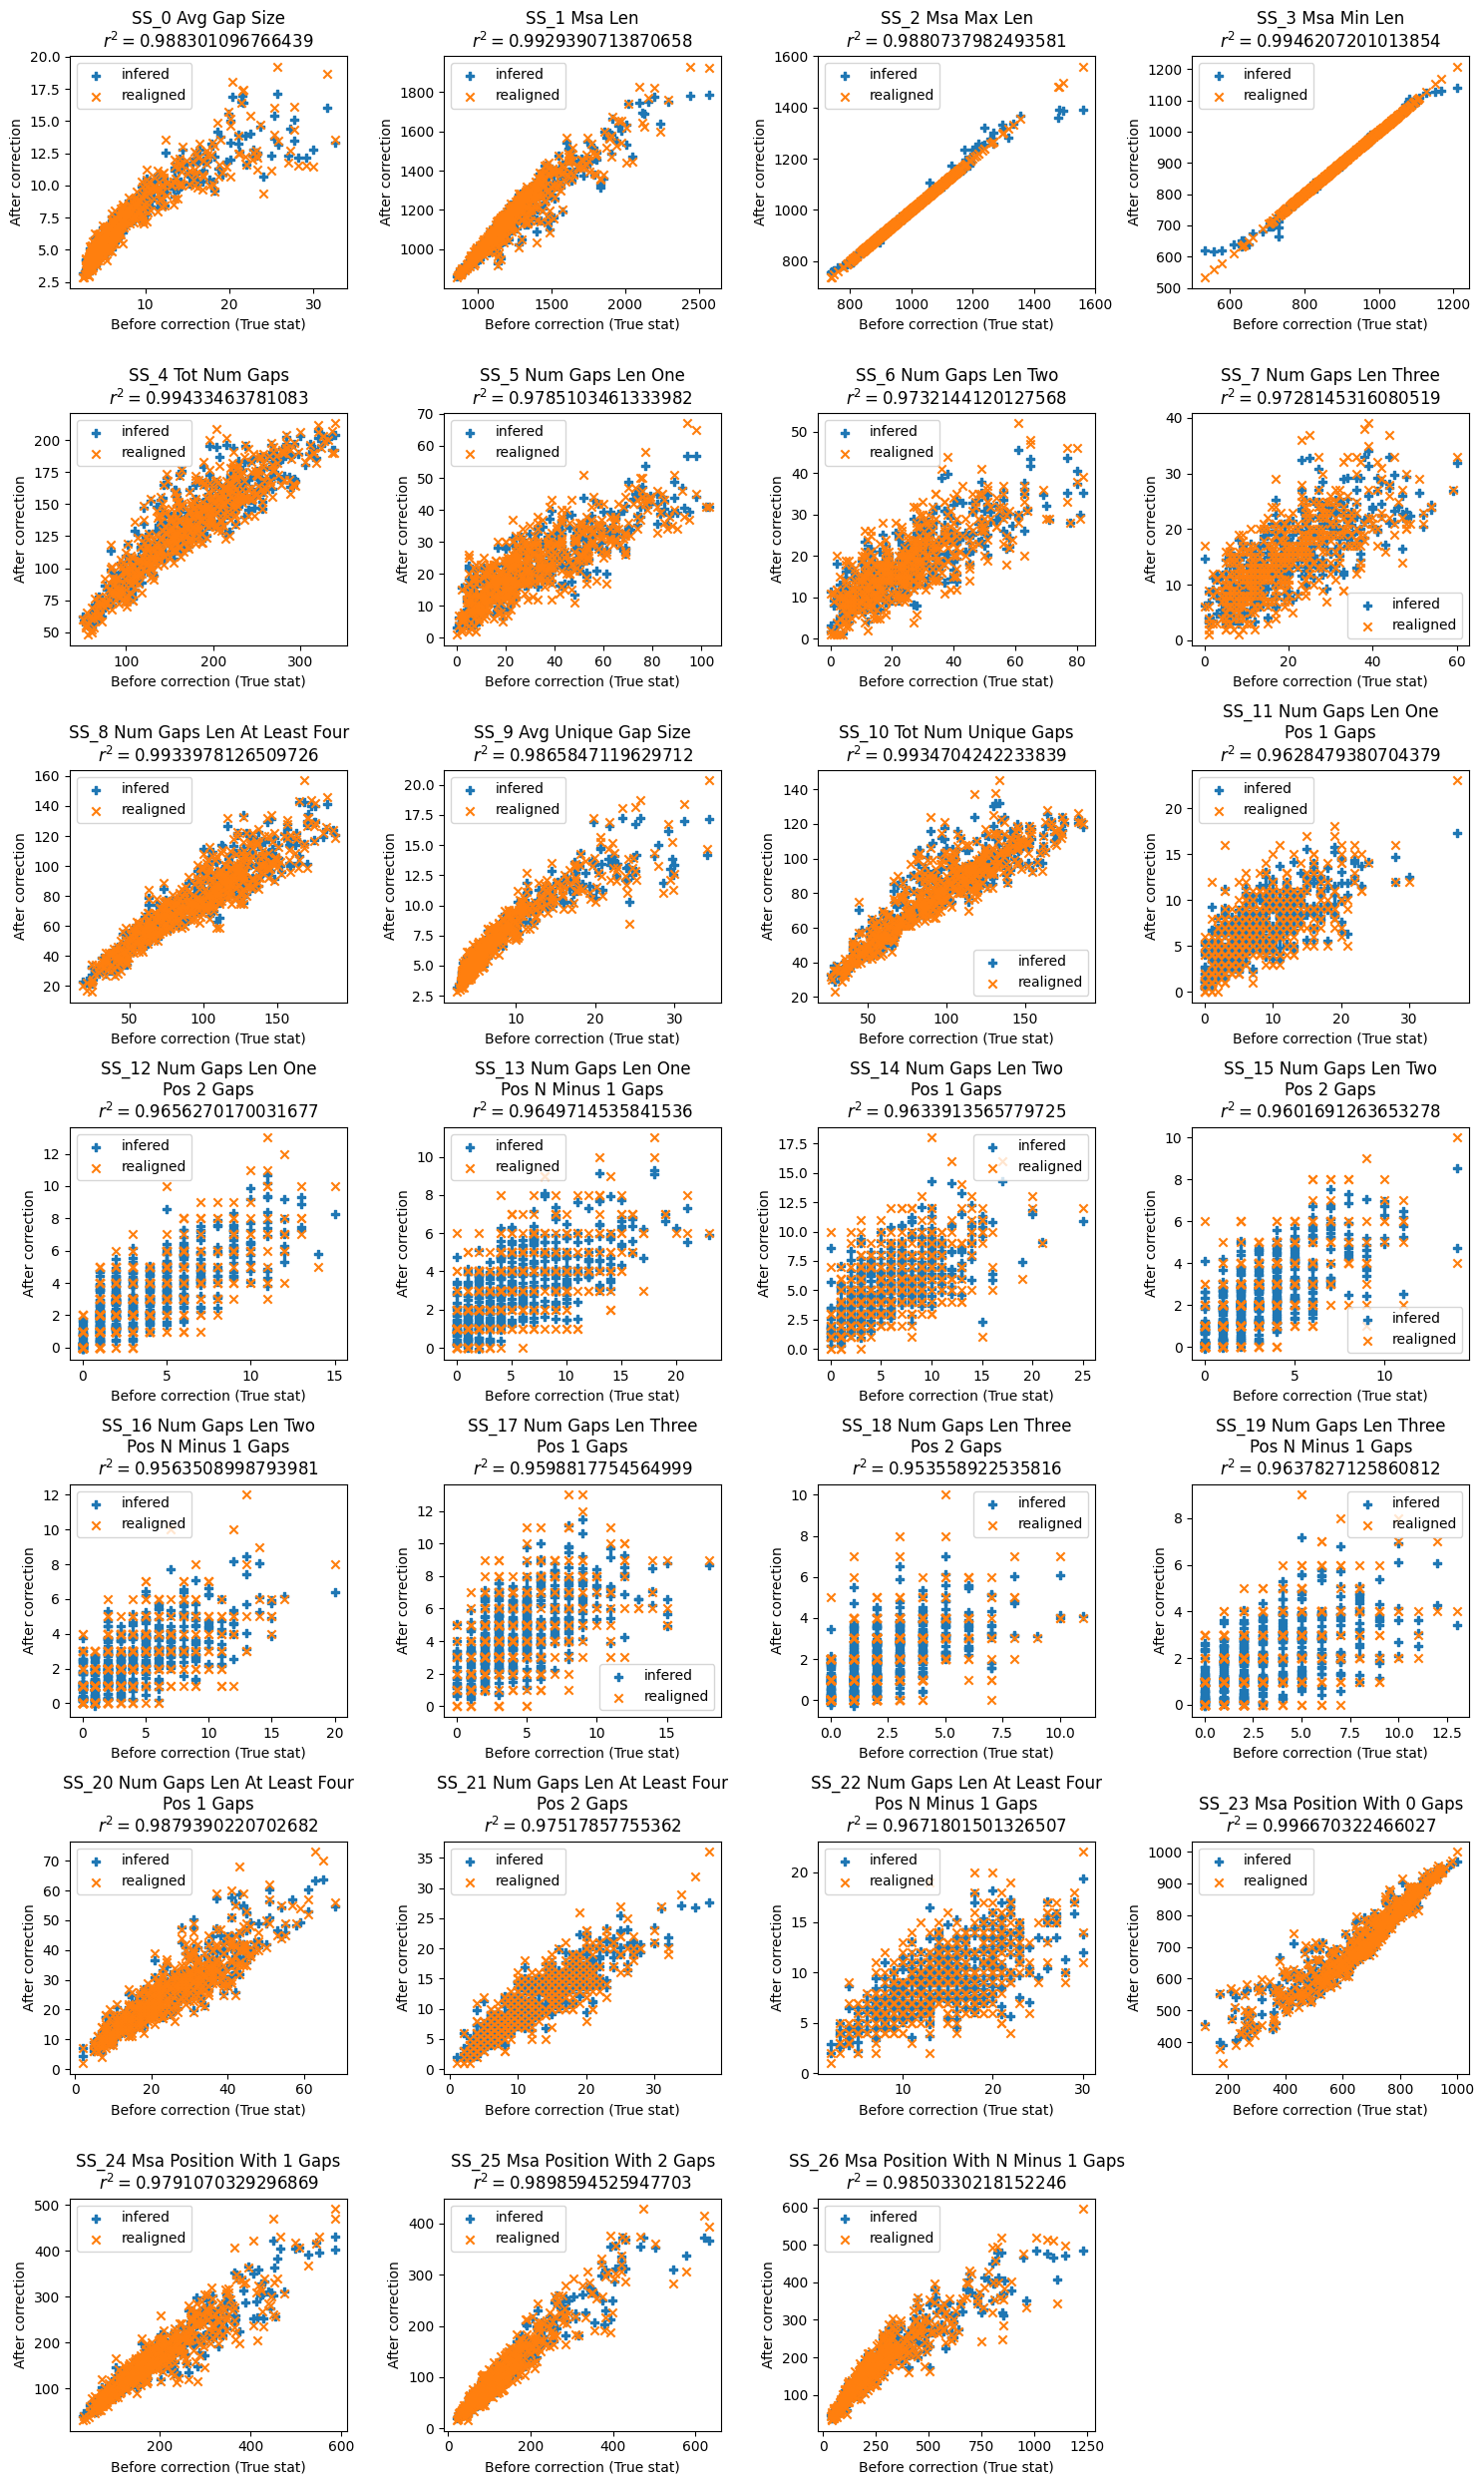

In [64]:
plt.figure(figsize=(15,25),layout="tight")

for sum_stat in range(27):
    current_feature = str(sum_stat)
    stat_def = SUMSTATS_DEFINITION[SUMSTATS_LIST[int(current_feature)]].replace("_", " ").title()
    plot_title = f"SS_{current_feature} {stat_def}"
    plt.subplot(7,4, sum_stat+1)
    plt.scatter(true_stats[current_feature], infered_stats[current_feature],
                marker="P", label="infered")
    plt.scatter(true_stats[current_feature], realinged_stats[current_feature],
                marker='x', label="realigned")
    plt.xlabel("Before correction (True stat)")
    plt.ylabel("After correction")
    plt.legend()
    r_value = st.pearsonr(realinged_stats[current_feature], infered_stats[current_feature])
    plt.title(f"{plot_title}\n$r^2={r_value[0]**2}$")

plt.show()